# Model Training & MLflow Tracking
- For training the Customer Churn Prediction model, we will use 7 different ML models. For each model we will track various parameters, metrics, and artifacts with best practices of MLOps.
- 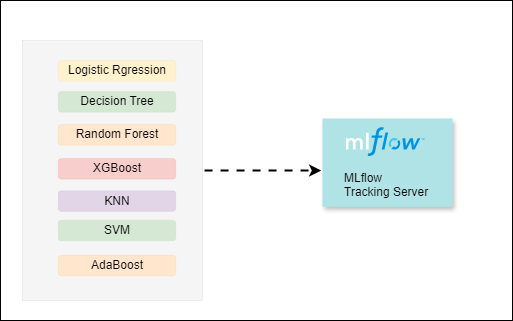

### Logistic Regression
- Implements logistic regression for binary classification. Tracks parameters, metrics, and artifacts using MLflow.

### MLflow Tracking:

- Parameters: max_iter, random_state, n_jobs
- Metrics: Accuracy, Precision, Recall, F1 Score
- Artifacts: Confusion Matrix, Classification Report, Trained Model

In [ ]:
#Configure MLflow
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Customer Churn Prediction")

In [13]:
# load train-test split data from pickle file
import pickle

# Load train-test split data
with open("/root/code/customer-churn-mlops/Dataset/train_test_split.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

# Verify loaded data
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (4711, 26)
Testing set shape: (2321, 26)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow
from mlflow.models import infer_signature

with mlflow.start_run(run_name="logistic_regression"):
    # Create and train model
    model_lg = LogisticRegression(max_iter=120, random_state=0, n_jobs=20)
    
    # Log parameters
    mlflow.log_params({
        "max_iter": 120,
        "random_state": 0,
        "n_jobs": 20
    })
    
    # Train model
    model_lg.fit(X_train, y_train)
    
    # Make predictions
    pred_lg = model_lg.predict(X_test)
    
    # Calculate and log accuracy
    lg = round(accuracy_score(y_test, pred_lg) * 100, 2)
    mlflow.log_metric("accuracy", lg)
    
    # Log classification report
    clf_report = classification_report(y_test, pred_lg)
    with open("lg_classification_report.txt", "w") as f:
        f.write(clf_report)
    mlflow.log_artifact("lg_classification_report.txt")
    
    # Create and log confusion matrix
    plt.figure(figsize=(8, 6))
    cm1 = confusion_matrix(y_test, pred_lg)
    sns.heatmap(cm1 / np.sum(cm1), annot=True, fmt='.2%', cmap="Reds")
    plt.title("Logistic Regression Confusion Matrix")
    plt.savefig("lg_confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("lg_confusion_matrix.png")
    
    # Calculate and log additional metrics
    precision = precision_score(y_test, pred_lg)
    recall = recall_score(y_test, pred_lg)
    f1 = f1_score(y_test, pred_lg)
    mlflow.log_metrics({
        "precision": precision,
        "recall": recall,
        "f1": f1
    })
    
    # Log the model
    signature = infer_signature(X_train, pred_lg)
    mlflow.sklearn.log_model(model_lg, "logistic_regression_model", signature=signature)

print(f"Logistic Regression Accuracy: {lg}%")
print("\nClassification Report:")
print(clf_report)


/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/17 21:35:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run logistic_regression at: http://localhost:5000/#/experiments/1/runs/1c0c58a2db5a4ddd94a9ab6f1a7d6483.
2025/02/17 21:35:04 INFO mlflow.tracking._tr

Logistic Regression Accuracy: 80.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1711
           1       0.64      0.54      0.58       610

    accuracy                           0.80      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.79      0.80      0.79      2321



### Decision Tree
- Trains a decision tree classifier for binary classification. Tracks parameters, metrics, and artifacts using MLflow.

### MLflow Tracking:

- Parameters: max_depth, random_state
- Metrics: Accuracy, Precision, Recall, F1 Score
- Artifacts: Confusion Matrix, Classification Report, Trained Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow
from mlflow.models import infer_signature

with mlflow.start_run(run_name="decision_tree"):
    # Create and train model
    model_dt = DecisionTreeClassifier(max_depth=4, random_state=42)
    
    # Log parameters
    mlflow.log_params({
        "max_depth": 4,
        "random_state": 42
    })
    
    # Train model
    model_dt.fit(X_train, y_train)
    
    # Make predictions
    pred_dt = model_dt.predict(X_test)
    
    # Calculate and log accuracy
    dt = round(accuracy_score(y_test, pred_dt) * 100, 2)
    mlflow.log_metric("accuracy", dt)
    
    # Log classification report
    clf_report = classification_report(y_test, pred_dt)
    with open("dt_classification_report.txt", "w") as f:
        f.write(clf_report)
    mlflow.log_artifact("dt_classification_report.txt")
    
    # Create and log confusion matrix
    plt.figure(figsize=(8, 6))
    cm2 = confusion_matrix(y_test, pred_dt)
    sns.heatmap(cm2 / np.sum(cm2), annot=True, fmt='.2%', cmap="Reds")
    plt.title("Decision Tree Classifier Confusion Matrix")
    plt.savefig("dt_confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("dt_confusion_matrix.png")
    
    # Calculate and log additional metrics
    precision = precision_score(y_test, pred_dt, average="weighted")
    recall = recall_score(y_test, pred_dt, average="weighted")
    f1 = f1_score(y_test, pred_dt, average="weighted")
    mlflow.log_metrics({
        "precision": precision,
        "recall": recall,
        "f1": f1
    })
    
    # Log the model
    signature = infer_signature(X_train, pred_dt)
    mlflow.sklearn.log_model(model_dt, "decision_tree_model", signature=signature)

print(f"Decision Tree Accuracy: {dt}%")
print("\nClassification Report:")
print(clf_report)


/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/17 21:38:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run decision_tree at: http://localhost:5000/#/experiments/1/runs/be3e3ff39b274030882032fb6d566ad1.
2025/02/17 21:38:30 INFO mlflow.tracking._tracking

Decision Tree Accuracy: 78.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1711
           1       0.63      0.48      0.54       610

    accuracy                           0.79      2321
   macro avg       0.73      0.69      0.70      2321
weighted avg       0.78      0.79      0.78      2321



### Random Forest
- Trains a random forest classifier for binary classification. Tracks parameters, metrics, and artifacts using MLflow.

### MLflow Tracking:

- Parameters: n_estimators, min_samples_leaf, random_state
- Metrics: Accuracy, Precision, Recall, F1 Score
- Artifacts: Confusion Matrix, Classification Report, Feature Importance, Trained Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

with mlflow.start_run(run_name="random_forest"):
    # Create and train model
    model_rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=0.16, random_state=42)
    
    # Log parameters
    mlflow.log_params({
        "n_estimators": 300,
        "min_samples_leaf": 0.16,
        "random_state": 42
    })
    
    # Train model
    model_rf.fit(X_train, y_train)
    
    # Make predictions
    pred_rf = model_rf.predict(X_test)
    
    # Calculate and log accuracy
    rf = round(accuracy_score(y_test, pred_rf) * 100, 2)
    mlflow.log_metric("accuracy", rf)
    
    # Log classification report
    clf_report = classification_report(y_test, pred_rf)
    with open("rf_classification_report.txt", "w") as f:
        f.write(clf_report)
    mlflow.log_artifact("rf_classification_report.txt")
    
    # Create and log confusion matrix
    plt.figure(figsize=(8, 6))
    cm3 = confusion_matrix(y_test, pred_rf)
    sns.heatmap(cm3 / np.sum(cm3), annot=True, fmt='.2%', cmap="Reds")
    plt.title("Random Forest Confusion Matrix")
    plt.savefig("rf_confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("rf_confusion_matrix.png")
    
    # Calculate and log additional metrics
    precision = precision_score(y_test, pred_rf, average="weighted")
    recall = recall_score(y_test, pred_rf, average="weighted")
    f1 = f1_score(y_test, pred_rf, average="weighted")
    mlflow.log_metrics({
        "precision": precision,
        "recall": recall,
        "f1": f1
    })
    
    # Log feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model_rf.feature_importances_
    }).sort_values('importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title("Top 10 Feature Importance - Random Forest")
    plt.savefig("rf_feature_importance.png")
    plt.close()
    mlflow.log_artifact("rf_feature_importance.png")
    
    # Log the model
    signature = infer_signature(X_train, pred_rf)
    mlflow.sklearn.log_model(model_rf, "random_forest_model", signature=signature)

print(f"Random Forest Metrics: Accuracy={rf}%, Precision={precision}, Recall={recall}, F1={f1}")


/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Random Forest Metrics: Accuracy=73.72%, Precision=0.5434376682857992, Recall=0.7371822490305903, F1=0.6256541806008632


### XGBoost
- Trains an XGBoost classifier for binary classification. Tracks parameters, metrics, and artifacts using MLflow.

### MLflow Tracking:

- Parameters: max_depth, n_estimators, learning_rate, random_state, n_jobs
- Metrics: Accuracy, Precision, Recall, F1 Score
- Artifacts: Confusion Matrix, Classification Report, Trained Model

In [17]:
from xgboost import XGBClassifier

with mlflow.start_run(run_name="xgboost"):
    # Create and train model
    model_xgb = XGBClassifier(max_depth=8, n_estimators=125, random_state=0, 
                              learning_rate=0.03, n_jobs=5)
    
    # Log parameters
    mlflow.log_params({
        "max_depth": 8,
        "n_estimators": 125,
        "learning_rate": 0.03,
        "random_state": 0,
        "n_jobs": 5
    })
    
    # Train model
    model_xgb.fit(X_train, y_train)
    
    # Make predictions
    pred_xgb = model_xgb.predict(X_test)
    
    # Calculate and log accuracy
    xgb = round(accuracy_score(y_test, pred_xgb) * 100, 2)
    mlflow.log_metric("accuracy", xgb)
    
    # Log classification report
    clf_report = classification_report(y_test, pred_xgb)
    with open("xgb_classification_report.txt", "w") as f:
        f.write(clf_report)
    mlflow.log_artifact("xgb_classification_report.txt")
    
    # Log confusion matrix
    plt.figure(figsize=(8, 6))
    cm4 = confusion_matrix(y_test, pred_xgb)
    sns.heatmap(cm4 / np.sum(cm4), annot=True, fmt='.2%', cmap="Reds")
    plt.title("XGBoost Confusion Matrix")
    plt.savefig("xgb_confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("xgb_confusion_matrix.png")
    
    # Log model
    signature = infer_signature(X_train, pred_xgb)
    mlflow.sklearn.log_model(model_xgb, "xgboost_model", signature=signature)

print(f"XGBoost Metrics: Accuracy={xgb}%, Precision={precision}, Recall={recall}, F1={f1}")


/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/17 21:38:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run xgboost at: http://localhost:5000/#/experiments/1/runs/a60a5268cfc54b9ea1d826a33d3788cb.
2025/02/17 21:38:56 INFO mlflow.tracking._tracking_servi

XGBoost Metrics: Accuracy=79.06%, Precision=0.5434376682857992, Recall=0.7371822490305903, F1=0.6256541806008632


### KNeighborsClassifier
- Trains a KNeighbors classifier for binary classification. Tracks parameters, metrics, and artifacts using MLflow.

### MLflow Tracking:

- Parameters: n_neighbors, leaf_size
- Metrics: Accuracy, Precision, Recall, F1 Score
- Artifacts: Confusion Matrix, Classification Report, Trained Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run(run_name="kneighbors"):
    # Create model
    model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
    
    # Log parameters
    mlflow.log_params({
        "n_neighbors": 9,
        "leaf_size": 20
    })
    
    # Train model
    model_kn.fit(X_train, y_train)
    
    # Make predictions
    pred_kn = model_kn.predict(X_test)
    
    # Calculate and log accuracy
    kn = round(accuracy_score(y_test, pred_kn) * 100, 2)
    mlflow.log_metric("accuracy", kn)
    
    # Log classification report
    clf_report = classification_report(y_test, pred_kn)
    with open("kn_classification_report.txt", "w") as f:
        f.write(clf_report)
    mlflow.log_artifact("kn_classification_report.txt")
    
    # Log confusion matrix
    plt.figure(figsize=(8, 6))
    cm5 = confusion_matrix(y_test, pred_kn)
    sns.heatmap(cm5 / np.sum(cm5), annot=True, fmt='.2%', cmap="Reds")
    plt.title("KNeighbors Confusion Matrix")
    plt.savefig("kn_confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("kn_confusion_matrix.png")
    
    # Log model
    signature = infer_signature(X_train, pred_kn)
    mlflow.sklearn.log_model(model_kn, "kneighbors_model", signature=signature)

print(f"KNeighbors Metrics: Accuracy={kn}%, Precision={precision}, Recall={recall}, F1={f1}")

/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/17 21:39:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run kneighbors at: http://localhost:5000/#/experiments/1/runs/4ef4b08cb59d462eb1e7dea29077688e.
2025/02/17 21:39:06 INFO mlflow.tracking._tracking_se

KNeighbors Metrics: Accuracy=76.99%, Precision=0.5434376682857992, Recall=0.7371822490305903, F1=0.6256541806008632


### SVM
- Trains a Support Vector Machine (SVM) classifier using the RBF kernel for binary classification. Tracks parameters, metrics, and artifacts with MLflow.

### MLflow Tracking:

- Parameters: kernel, random_state
- Metrics: Accuracy, Precision, Recall, F1 Score
- Artifacts: Confusion Matrix, Classification Report, Trained Model

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow
from mlflow.models import infer_signature

with mlflow.start_run(run_name="svm_classifier"):
    # Create and train model
    model_svm = SVC(kernel='rbf', random_state=42)
    
    # Log parameters
    mlflow.log_params({
        "kernel": "rbf",
        "random_state": 42
    })
    
    # Train model
    model_svm.fit(X_train, y_train)
    
    # Make predictions
    pred_svm = model_svm.predict(X_test)
    
    # Calculate and log accuracy
    sv = round(accuracy_score(y_test, pred_svm)*100, 2)
    mlflow.log_metric("accuracy", sv)
    
    # Log classification report
    clf_report = classification_report(y_test, pred_svm)
    with open("svm_classification_report.txt", "w") as f:
        f.write(clf_report)
    mlflow.log_artifact("svm_classification_report.txt")
    
    # Create and log confusion matrix
    plt.figure(figsize=(8, 6))
    cm6 = confusion_matrix(y_test, pred_svm)
    sns.heatmap(cm6/np.sum(cm6), annot=True, fmt='0.2%', cmap="Reds")
    plt.title("SVM Classifier Confusion Matrix")
    plt.savefig("svm_confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("svm_confusion_matrix.png")
    
    # Log additional metrics
    mlflow.log_metrics({
        "precision": precision_score(y_test, pred_svm),
        "recall": recall_score(y_test, pred_svm),
        "f1": f1_score(y_test, pred_svm)
    })
    
    # Log the model
    signature = infer_signature(X_train, pred_svm)
    mlflow.sklearn.log_model(model_svm, "svm_model", signature=signature)

print(f"SVM Classifier Accuracy: {sv}%")
print("\nClassification Report:")
print(classification_report(y_test, pred_svm))


/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/17 21:39:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run svm_classifier at: http://localhost:5000/#/experiments/1/runs/7094e9cf3ae24f08a242ea4ce53d36aa.
2025/02/17 21:39:15 INFO mlflow.tracking._trackin

SVM Classifier Accuracy: 79.84%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.50      0.57       610

    accuracy                           0.80      2321
   macro avg       0.74      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321



### AdaBoost Classifier
- Trains an AdaBoost classifier for binary classification. Tracks parameters, metrics, and artifacts with MLflow.

### MLflow Tracking:

- Parameters: learning_rate, n_estimators, random_state
- Metrics: Accuracy, Precision, Recall, F1 Score
- Artifacts: Confusion Matrix, Classification Report, Feature Importance, Trained Model

In [20]:
from sklearn.ensemble import AdaBoostClassifier

with mlflow.start_run(run_name="adaboost"):
    # Create model
    model_ada = AdaBoostClassifier(
        learning_rate=0.002,
        n_estimators=205,
        random_state=42
    )
    
    # Log parameters
    mlflow.log_params({
        "learning_rate": 0.002,
        "n_estimators": 205,
        "random_state": 42
    })
    
    # Train model
    model_ada.fit(X_train, y_train)
    
    # Make predictions
    pred_ada = model_ada.predict(X_test)
    
    # Calculate and log accuracy
    ada = round(accuracy_score(y_test, pred_ada) * 100, 2)
    mlflow.log_metric("accuracy", ada)
    
    # Log classification report
    clf_report = classification_report(y_test, pred_ada)
    with open("ada_classification_report.txt", "w") as f:
        f.write(clf_report)
    mlflow.log_artifact("ada_classification_report.txt")
    
    # Log confusion matrix
    plt.figure(figsize=(8, 6))
    cm7 = confusion_matrix(y_test, pred_ada)
    sns.heatmap(cm7 / np.sum(cm7), annot=True, fmt='.2%', cmap="Reds")
    plt.title("AdaBoost Confusion Matrix")
    plt.savefig("ada_confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("ada_confusion_matrix.png")
    
    # Log feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model_ada.feature_importances_
    }).sort_values('importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title("Top 10 Feature Importance - AdaBoost")
    plt.savefig("ada_feature_importance.png")
    plt.close()
    mlflow.log_artifact("ada_feature_importance.png")
    
    # Log model
    signature = infer_signature(X_train, pred_ada)
    mlflow.sklearn.log_model(model_ada, "adaboost_model", signature=signature)

print(f"AdaBoost Metrics: Accuracy={ada}%, Precision={precision}, Recall={recall}, F1={f1}")


/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/code/customer-churn-mlops/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

AdaBoost Metrics: Accuracy=73.72%, Precision=0.5434376682857992, Recall=0.7371822490305903, F1=0.6256541806008632


### Model Comparison
- To compare the performance of different models, we will create a bar plot visualization and CSV files with accuracy metrics. For this we will use the accuracy scores of each model.

In [21]:
# Create and log model comparison visualization in MLflow
with mlflow.start_run(run_name="model_comparison"):
    # Create DataFrame with model performances
    models = pd.DataFrame({
        'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 
                'XGBoost', 'KNN', 'SVM', 'AdaBoost'],
        'Accuracy': [lg, dt, rf, xgb, kn, sv, ada]
    })
    
    # Create comparison plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Accuracy', y='Model', data=models)
    plt.title('Model Performance Comparison')
    plt.xlabel('Accuracy Score (%)')
    plt.ylabel('Models')
    
    # Save plot
    plt.savefig("model_comparison.png")
    plt.close()
    
    # Log the comparison plot
    mlflow.log_artifact("model_comparison.png")
    
    # Log individual model accuracies
    for model, accuracy in zip(models['Model'], models['Accuracy']):
        mlflow.log_metric(f"{model.lower().replace(' ', '_')}_accuracy", accuracy)
    
    # Log the comparison table as CSV
    models.to_csv("model_comparison.csv", index=False)
    mlflow.log_artifact("model_comparison.csv")
    
    # Create and log sorted accuracies table
    sorted_models = models.sort_values(by='Accuracy', ascending=False)
    print("\nModel Accuracies Ranked:")
    print(sorted_models)
    
    # Save sorted results
    sorted_models.to_csv("sorted_model_comparison.csv", index=False)
    mlflow.log_artifact("sorted_model_comparison.csv")


2025/02/17 21:40:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run model_comparison at: http://localhost:5000/#/experiments/1/runs/cbcf0c06452747e8a689c1fcc04955a6.
2025/02/17 21:40:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.



Model Accuracies Ranked:
                 Model  Accuracy
0  Logistic Regression     80.01
5                  SVM     79.84
3              XGBoost     79.06
1        Decision Tree     78.89
4                  KNN     76.99
2        Random Forest     73.72
6             AdaBoost     73.72


### Register Best Model
- To register the best model, we will use the MlflowClient to search for the best run based on accuracy and then register the model from the best run to the model registry and transition it to the 'Production' stage.

In [22]:
from mlflow.tracking import MlflowClient

def register_best_model(experiment_name="Customer Churn Prediction"):
    """
    Registers the best-performing model from the MLflow experiment
    to the model registry and transitions it to the 'Production' stage.
    """
    client = MlflowClient()
    
    # Retrieve experiment details
    experiment = client.get_experiment_by_name(experiment_name)
    if not experiment:
        raise ValueError(f"Experiment '{experiment_name}' not found.")
    
    # Identify the best run based on a key metric (e.g., accuracy)
    best_run = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        order_by=["metrics.accuracy DESC"]
    )[0]
    
    # Register the model from the best run
    model_uri = f"runs:/{best_run.info.run_id}/model"
    model_name = "customer_churn_prediction_model"
    model_version = mlflow.register_model(model_uri, model_name)
    
    # Transition the model to the 'Production' stage
    client.transition_model_version_stage(
        name=model_name,
        version=model_version.version,
        stage="Production"
    )
    
    print(f"Model {model_name} version {model_version.version} is now in 'Production' stage.")
    return model_version

# Call the function after model training and comparison
best_model_version = register_best_model()
print(f"Registered model version: {best_model_version.version}")


Successfully registered model 'customer_churn_prediction_model'.
2025/02/17 21:40:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: customer_churn_prediction_model, version 1


Model customer_churn_prediction_model version 1 is now in 'Production' stage.
Registered model version: 1


Created version '1' of model 'customer_churn_prediction_model'.
/tmp/ipykernel_25689/3965261708.py:27: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


### Model Tracking Verification in MLflow
 - output 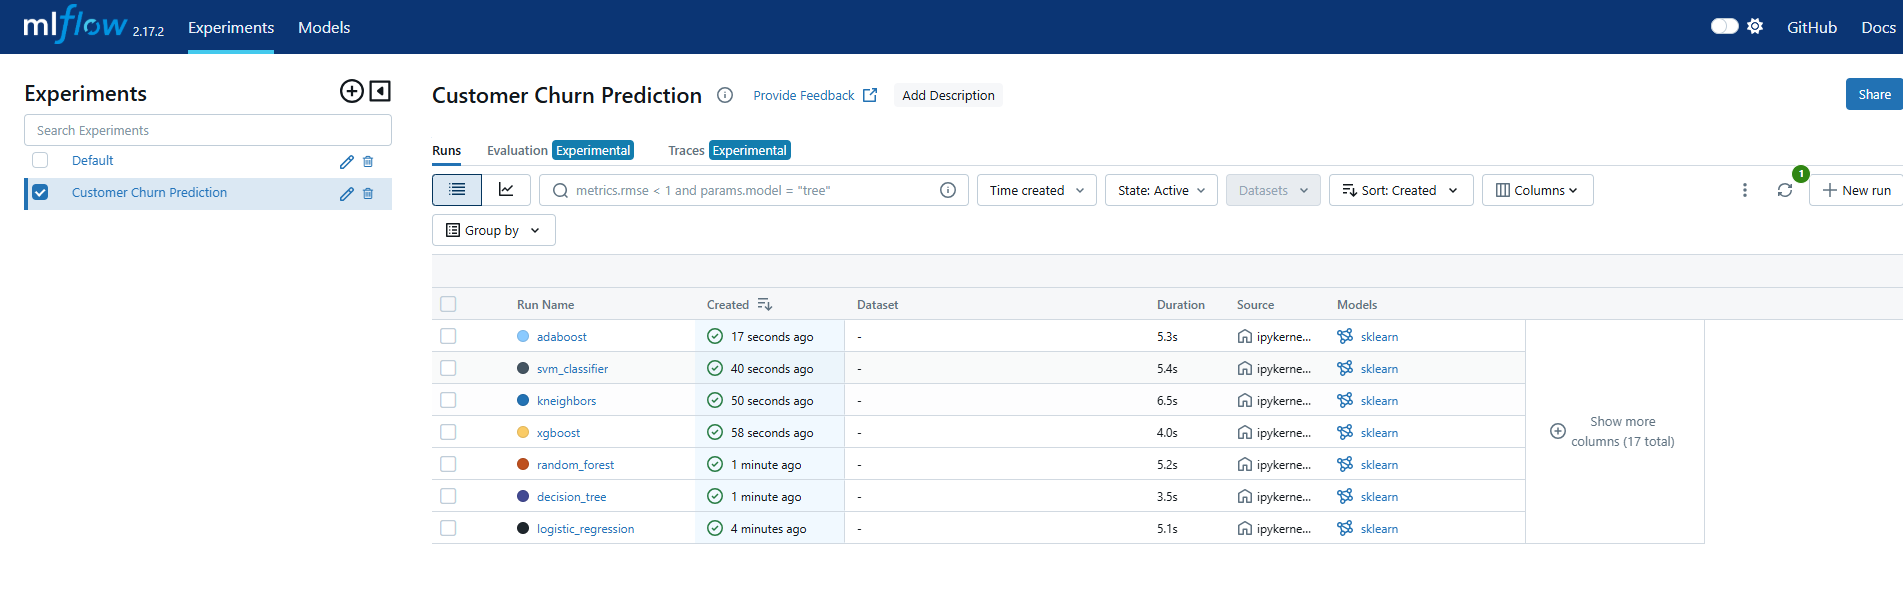

- For each model run, verify the parameters, metrics, and artifacts.For example we can see the overview, metrics & artifacts for SVM:
- 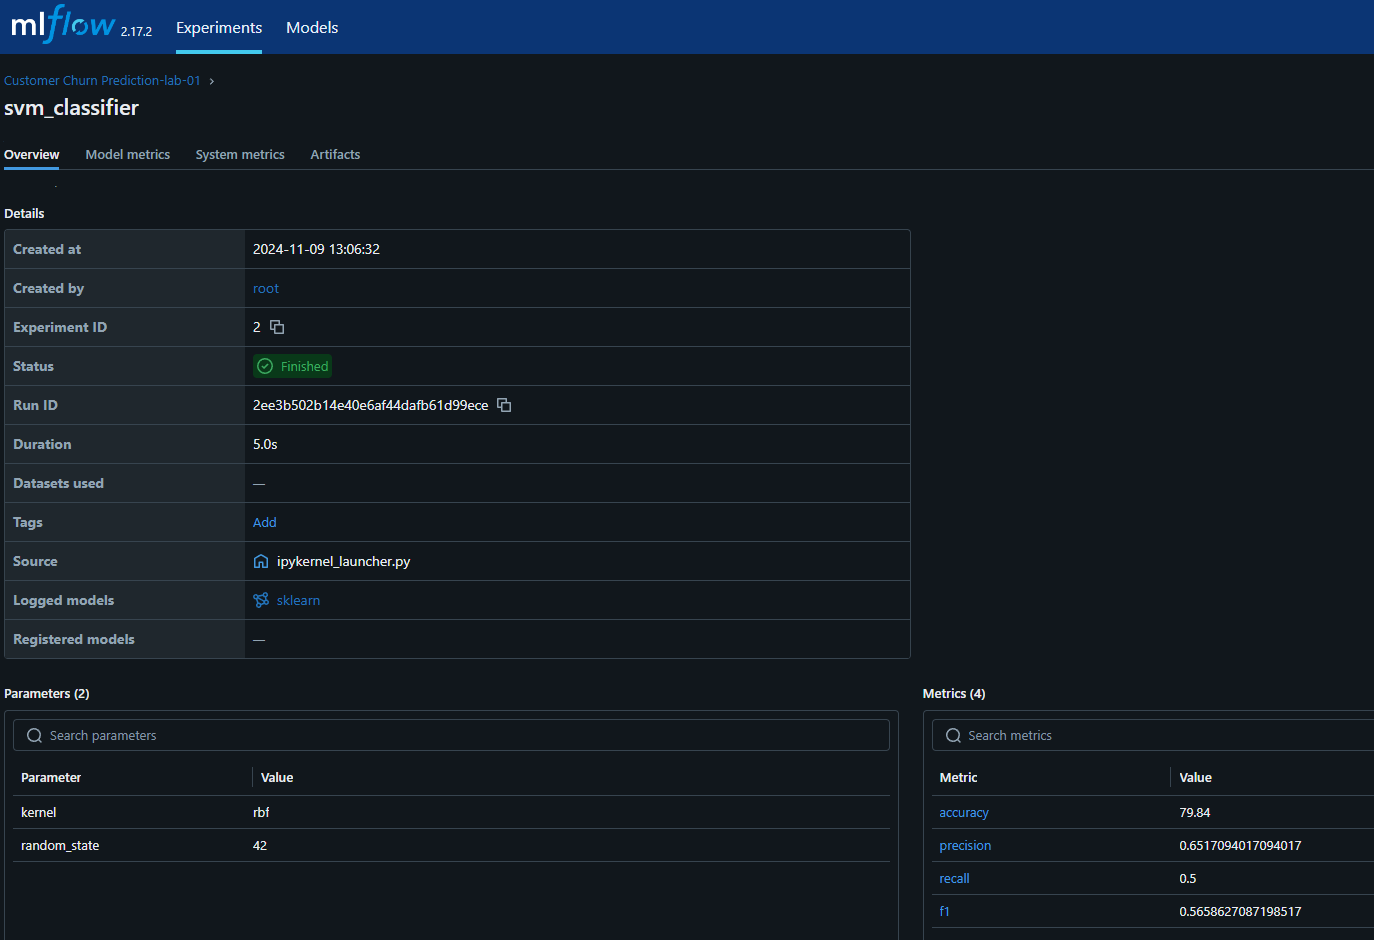
- 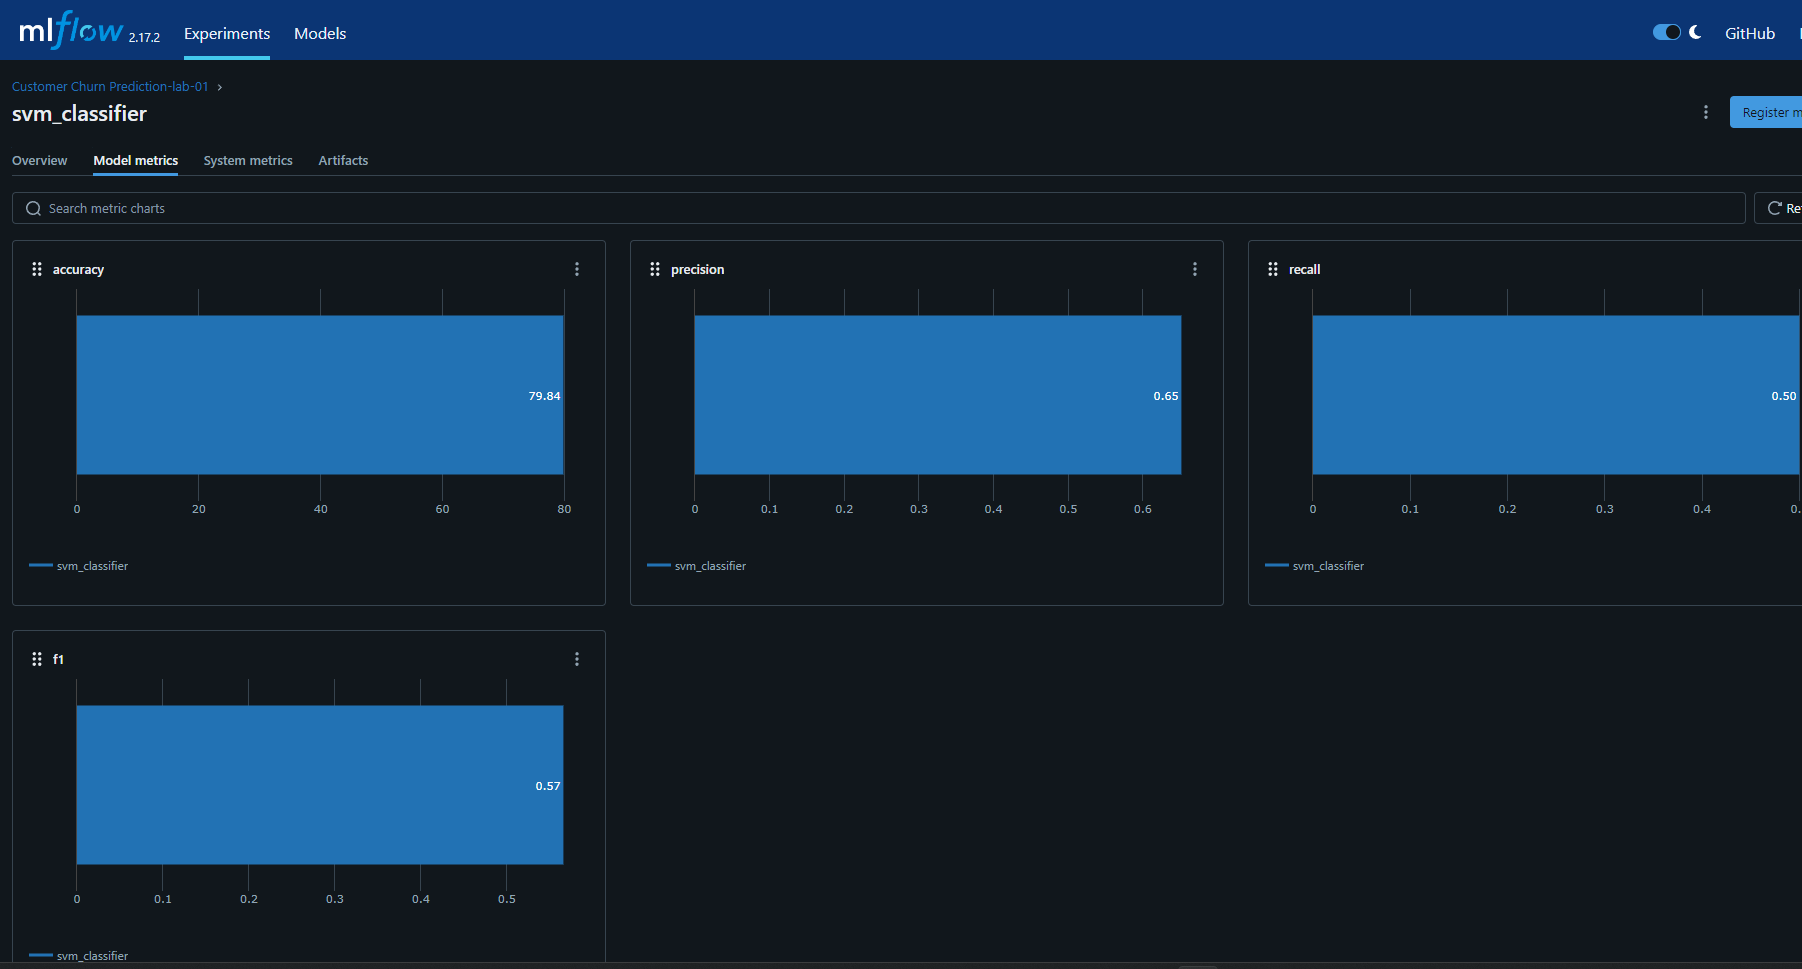
- 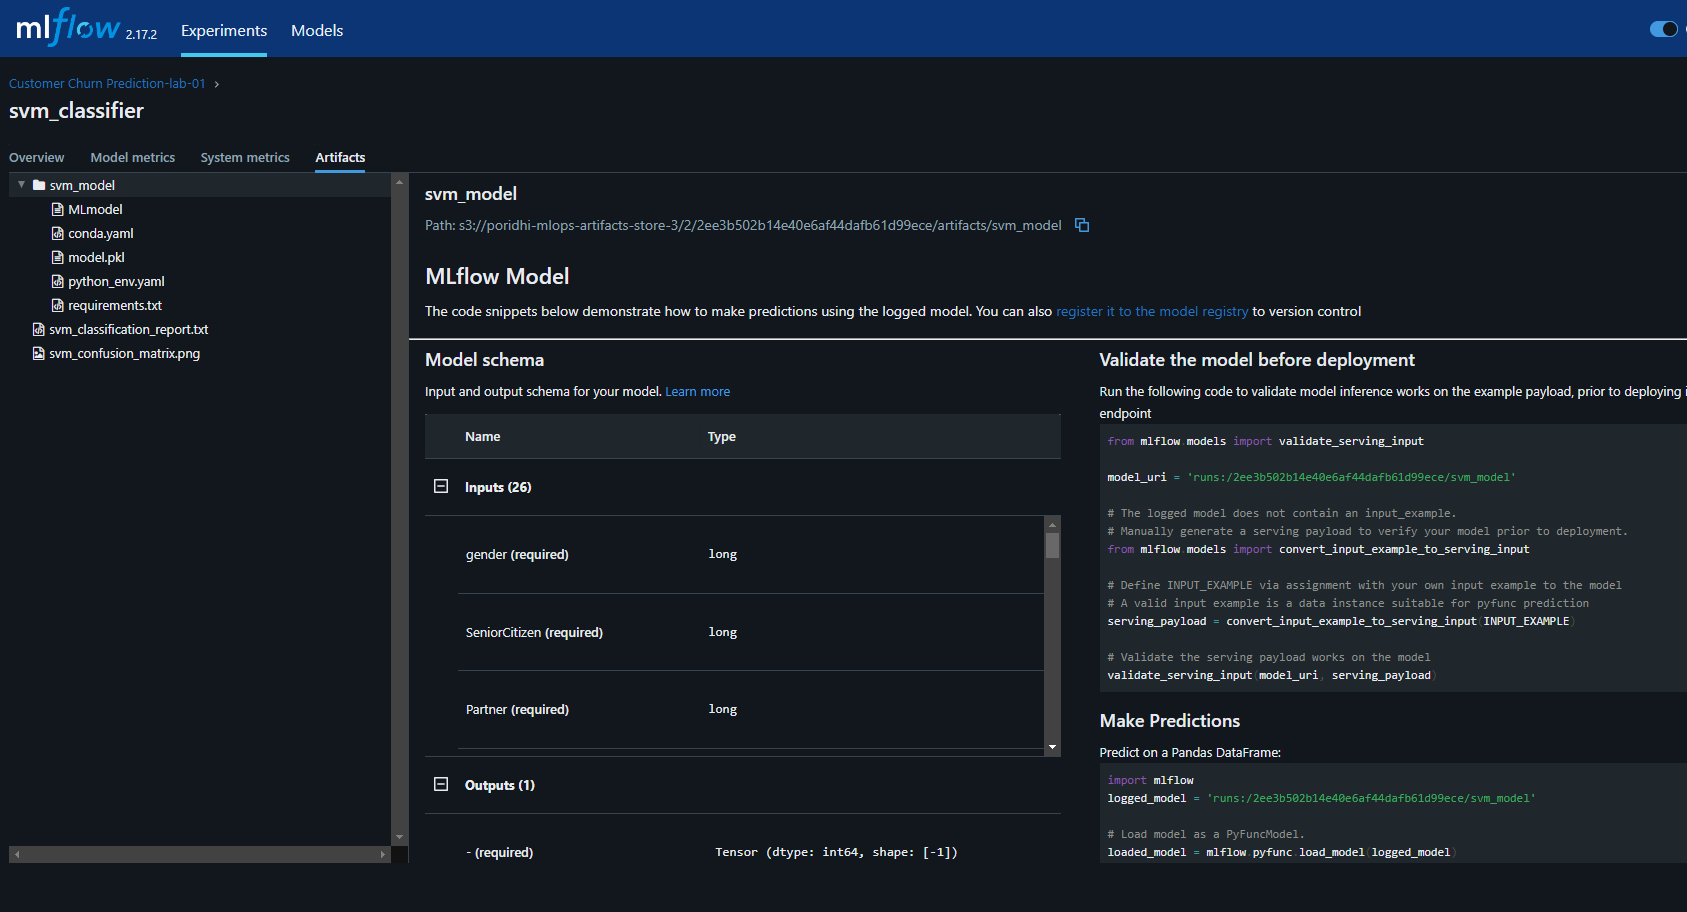
- By following the above steps, you can verify the parameters, metrics, and artifacts for other models as well.

### Model Comparison Verification
- In the MLflow UI, navigate to "Model Comparison" experiment and verify the comparison plot and CSV files with accuracy metrics.
- 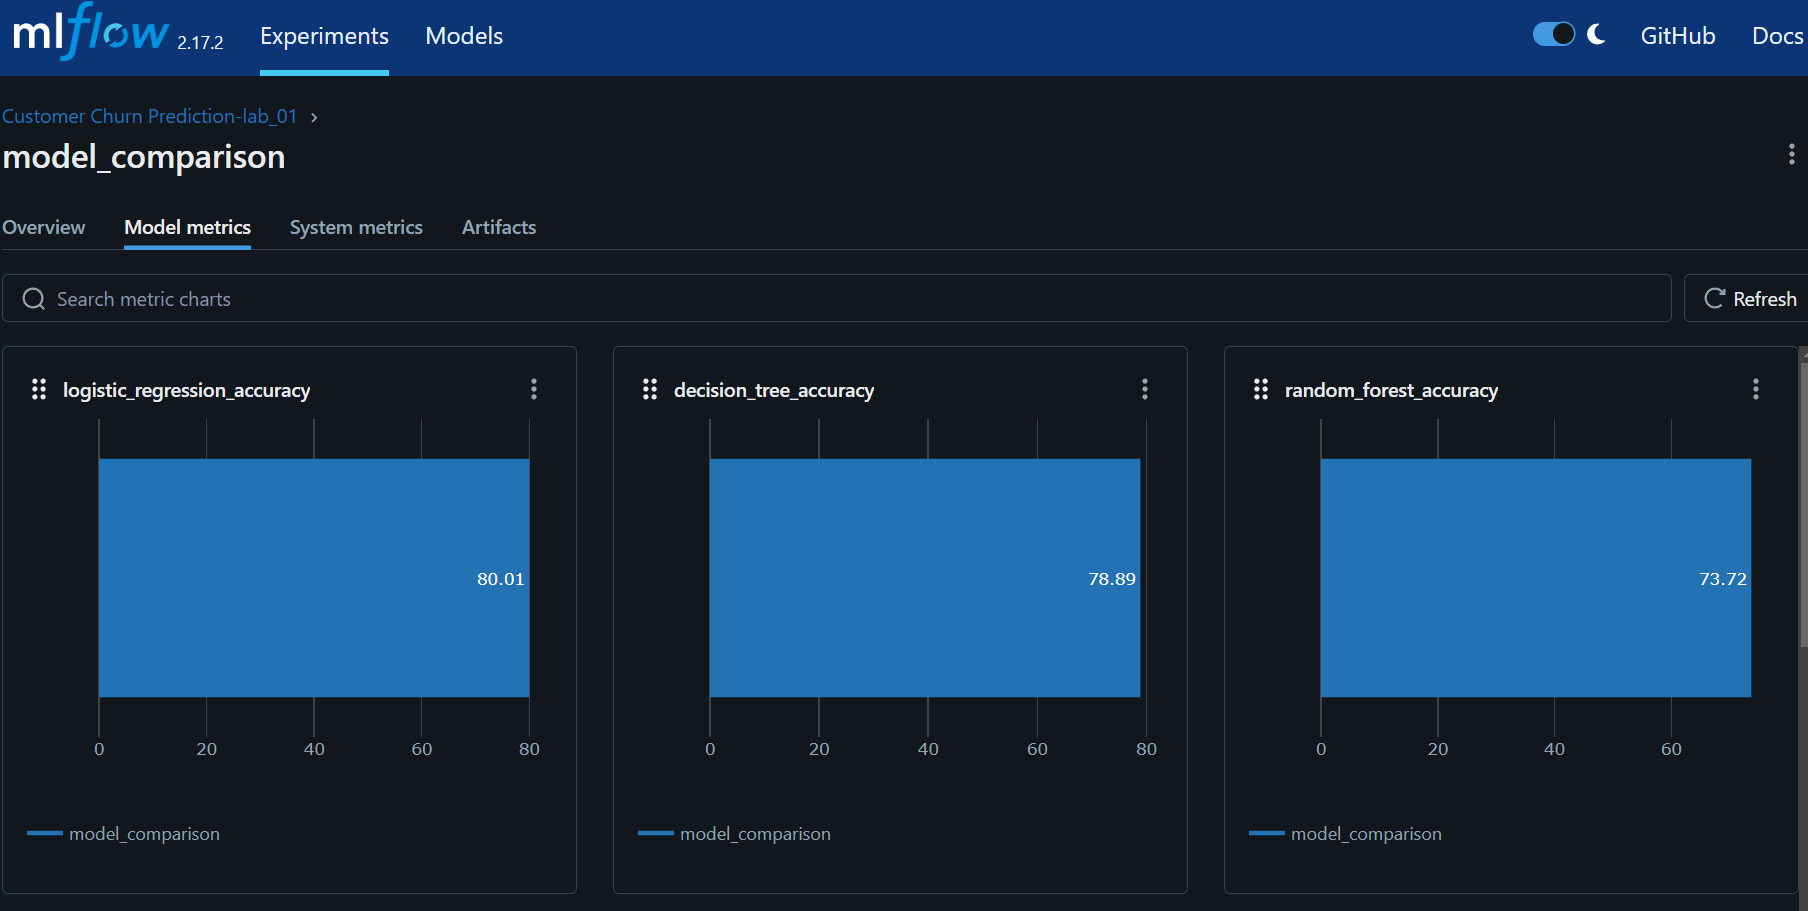

### Register Best Model Verification
- In the MLflow UI, navigate to "Model Registry" and verify the registered model and its version in the "Production" stage.
- 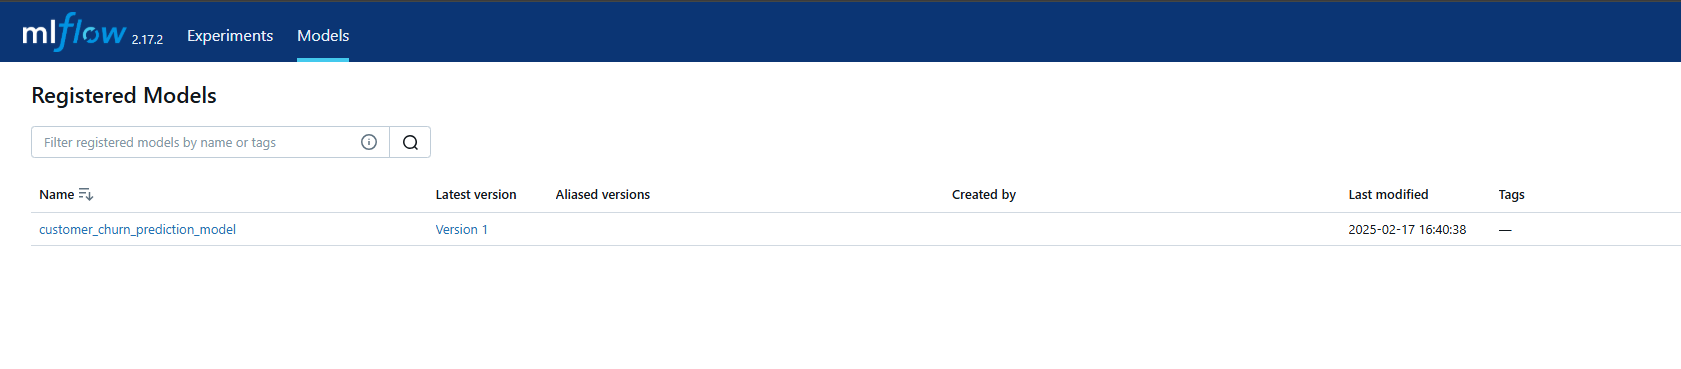

### S3 Artifact Verification
- Go to AWS Console and navigate to S3 bucket <your-bucket-name> to verify the artifacts.
- 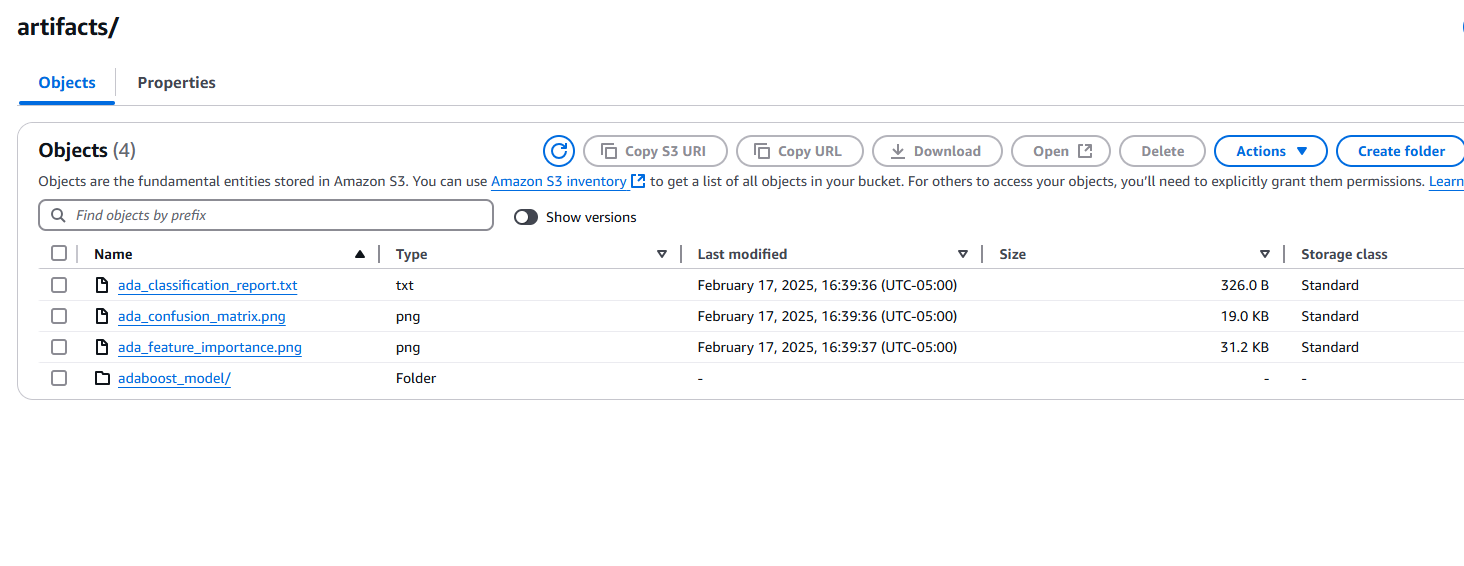
- For each model run, you should see the artifacts in the S3 bucket.

### PostgreSQL Verification
- Connect to the PostgreSQL container:

```bash
docker exec -it <postgres-container-id> /bin/sh
```

- Connect to PostgreSQL:
```bash
psql -h localhost -U mlflow -d mlflow

-- View experiments
SELECT * FROM experiments;
```
- output looks like
- 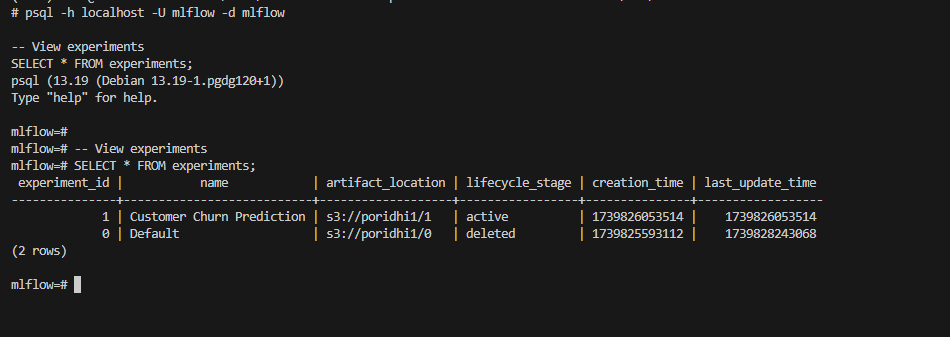

### View runs and metrics:
```bash
SELECT 
    r.run_uuid,
    r.experiment_id,
    m.key as metric_name,
    m.value as metric_value
FROM runs r
JOIN metrics m ON r.run_uuid = m.run_uuid
WHERE r.experiment_id = '1'
ORDER BY r.start_time DESC;
```

- output
- 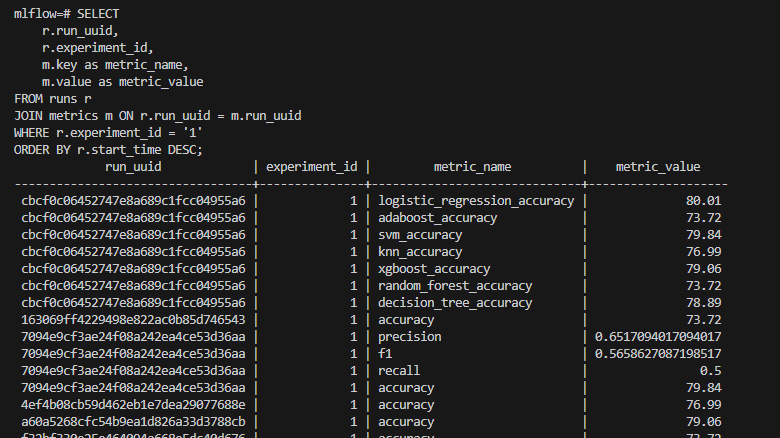

# Conclusion
- Here I have implemented a complete MLOps pipeline for a customer churn prediction problem. I have used MLflow for model tracking, S3 for artifact storage, and PostgreSQL for metadata storage for each model run. The visualization analysis revealed important insights about customer churn patterns, particularly its relationship with service usage, payment methods, and contract types.